*Name:* Manas Rastogi

*Roll_Number:* 22f3001477

*OPE_Date:* 03 - May - 2025

*OPE :* DL Workshop Assessment

In [1]:
import torch

# Here I am initializing the torch function

Q1.
Set the random seed to 123 using PyTorch, then create a 3x5 tensor with random integers between 1 (inclusive) and 100 (exclusive) using randint Finally, compute and return the sum of all elements in the tensor.


In [2]:
torch.manual_seed(123)  # setting the manual seed

t = torch.randint(1, 100, (3, 5)) # using builtin randint it function to creat the tensor

print(t) # printing t to look into it

print(torch.sum(t)) # as usual printing the sum

tensor([[59, 92, 31, 82, 92],
        [51, 55, 21, 87, 17],
        [54, 62, 58, 62, 29]])
tensor(852)


Q2.
what is the value of p(z) in given below equation? where
z
=
1.2
z=1.2 (write the answer correct upto 2 decimals)

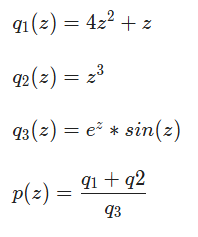



In [3]:
z = torch.tensor(1.2, requires_grad=True)

q1 = 4 * (z ** 2) + z
q2 = z ** 3
q3 = (torch.exp(z)) * torch.sin(z)

p = (q1 + q2) / q3

p.backward() # for gradient pourposes

with torch.no_grad():
    print(p)

# Simply printing p


tensor(2.8076, grad_fn=<DivBackward0>)


Q3.
what is the value of ∂p/∂z? where z = 1.2


In [4]:

with torch.no_grad():
  print(z.grad)

# In this code block i tried to calculate the gradient using builtin function p.backward()


tensor(0.9224)


Q4.
what is the value of
∂
p
∂
q
3
∂q3
∂p
​
  ? where z = 1.2 (write the answer correct upto 2 decimals)

In [5]:
dp_dq3 = -q2 / (q3**2)
dp_dq3

# Here I am not getting how to calculate so using some mathematics to find the solpe(gradient)

tensor(-0.1805, grad_fn=<DivBackward0>)

Q5.
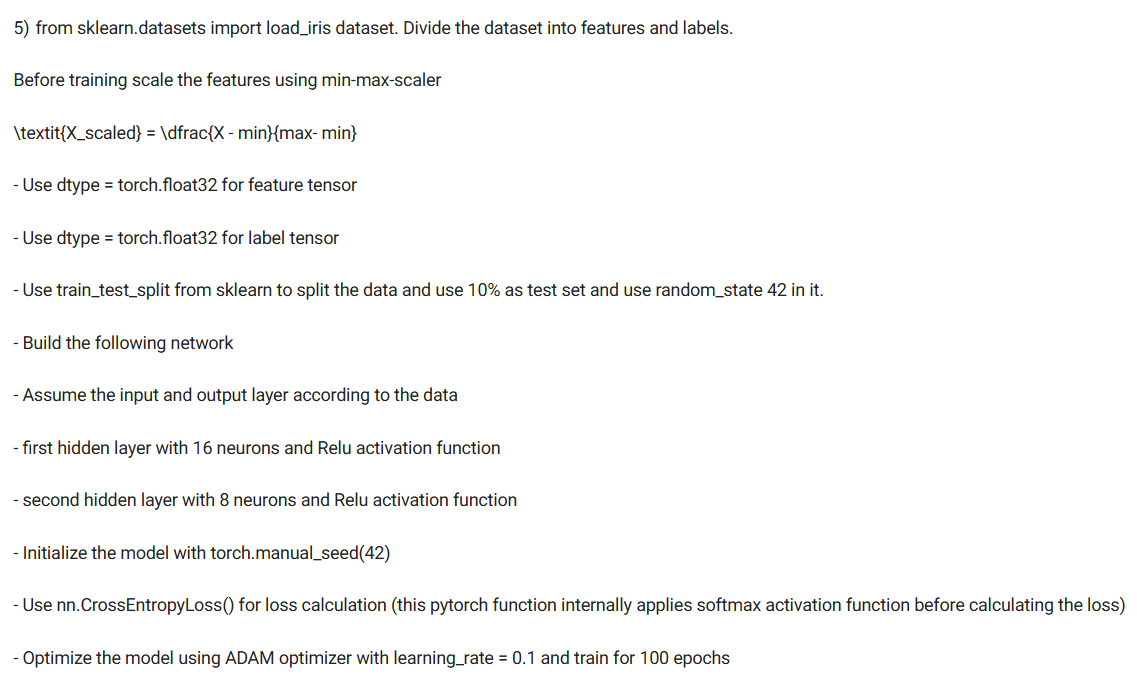
**Hint-** Run the code cell multiple times if it's showing different loss values that means manual_seed(42) was not set correctly

**Enter the number of parameters (weights & biases both) in the network.**

In [6]:
from sklearn.datasets import load_iris
# Lib import

data = load_iris()
# Loading data

X = data.data
y = data.target


In [7]:
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

# Doing Min-Max scaling as given in the formula

# Ik it can also be done by the sklearn MinMax Library (but trying to follow the instructions as much as i can)

In [8]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
X_train = torch.tensor(X_tr, dtype=torch.float32)
X_test = torch.tensor(X_te, dtype=torch.float32)
y_train = torch.tensor(y_tr, dtype=torch.long)
y_test = torch.tensor(y_te, dtype=torch.long)

In [10]:

from torch import nn

torch.manual_seed(42)

layer_1 = nn.Linear(in_features=4, out_features=16)
layer_2 = nn.Linear(in_features=16, out_features=8)
layer_3 = nn.Linear(in_features=8, out_features=3)

relu = nn.ReLU()

torch.manual_seed(42)

model = nn.Sequential(
    layer_1,
    relu,
    layer_2,
    relu,
    layer_3
)
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=3, bias=True)
)

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

for epoch in range(100):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



In [12]:
count = 0
for param in model.parameters():
    count += param.numel()

count

# Counting the number of parameters

243

Q6.
Use test set from earlier train_test_split to evaluate the model and find the accuracy of the model for test set?

Note: Remember the model was trained with manual_seed=42 (correct answer upto two decimals)


In [13]:
import torch
from sklearn.metrics import accuracy_score

model.eval() # evaluating the model
with torch.no_grad():
    y_pred = model(X_test)
    y_predicted = torch.argmax(y_pred, dim=1)
    accuracy = accuracy_score(y_test,y_predicted)
    print(accuracy)

# on the very first run the accuracy was 0.6 then it became 1.0 and never changed again


1.0


Q7.
Design a CNN with one convolutional layer (16 filters, 5x5 kernel, stride = 2, padding = 1) followed by an average-pooling layer (2x2).

Use the below code to generate the random images

1
img = torch.randint(0, 256, size=(128, 3, 32, 32), dtype=torch.float32)


what will be the output size after the average-pooling layer?


In [22]:

img = torch.randint(0, 256, size=(128, 3, 32, 32), dtype=torch.float32)
input_size = img.shape[2:]

conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=2, padding=1)
conv_output = conv_layer(img)
conv_output_size = conv_output.shape[2:]

pool_layer = nn.AvgPool2d(kernel_size=2)
pool_output = pool_layer(conv_output)
pool_output_size = pool_output.shape[2:]


print(pool_output_size)


torch.Size([7, 7])


Q8. Using the torchvision.datasets module, load the CIFAR-10 training dataset and use torchvision.transforms to convert them into tensors.

Use DataLoader to load the dataset with the following settings:

Batch size = 128
Shuffle = True
How many training data points are there in the last batch?

In [15]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader


transform = transforms.ToTensor()


train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) # loading the data


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


for i, (images, labels) in enumerate(train_loader):
  if i == len(train_loader) -1:
    print(images.shape[0])
    break


80


Q9. What is the size, in pixels, of a single image tensor in the CIFAR-10 dataset?

In [16]:
print(3*32*32) # can't recall any code to find the shape from my prev. knowledge 32 X 32 with 3 RBG


3072


Q10. Use the following dataset for training a simple RNN model:

```py
torch.manual_seed(42)
X_train = torch.randn(10_000, 12, 5, dtype=torch.float32) # i.e. 10K reviews , 12 words , 5 size embeding

y_train = torch.randint(0, 2, size=(10_000,), dtype=torch.float32)
```

Use the manual seed to be 42.
Define and train an RNN-based model with the following architecture:
RNN Layer: Use nn.RNN with:
input_size determined from X_train hidden_size=16
num_layer=3
batch_first=True
Fully Connected (Linear) Layer:
Maps the output from the RNN to a single output neuron
in_features should match the output feature size from the RNN
out_features=1
Apply a Sigmoid activation after the Linear layer for binary classification
Loss Function: Use nn.BCELoss() (binary cross-entropy loss).
Optimizer: Use Stochastic Gradient Descent (SGD) with a learning rate of 0.1
Training:
Train the model for 10 epochs in full batch
Report the training loss after the last epoch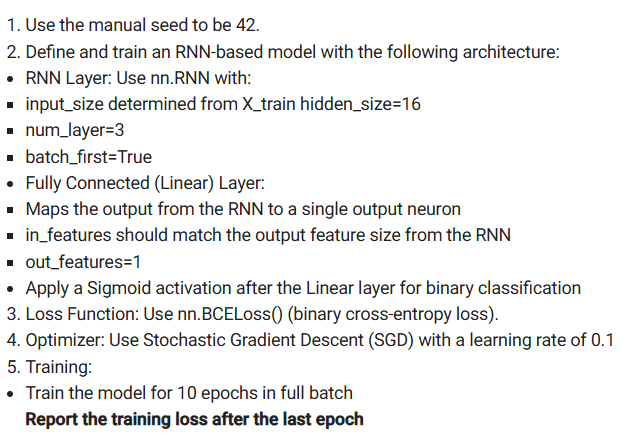

Note: The loss will not change upon running the same code cell multiple times  if manual seed is set.

In [17]:
torch.manual_seed(42)
X_train = torch.randn(10_000, 12, 5, dtype=torch.float32)
y_train = torch.randint(0, 2, size=(10_000,), dtype=torch.float32)

In [18]:
torch.manual_seed(42)

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        out = self.sigmoid(out)
        return out
# trying to write best from the memory following instructions

In [19]:
input_size = X_train.shape[2]
hidden_size = 16
num_layers = 3
model = RNNModel(input_size, hidden_size, num_layers)

In [20]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [21]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred.squeeze(), y_train)
    print("Epoch :", epoch, "/ 10 Loss", loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(loss.item())

Epoch : 0 / 10 Loss 0.693940281867981
Epoch : 1 / 10 Loss 0.6938928961753845
Epoch : 2 / 10 Loss 0.6938517689704895
Epoch : 3 / 10 Loss 0.6938157677650452
Epoch : 4 / 10 Loss 0.6937843561172485
Epoch : 5 / 10 Loss 0.6937568187713623
Epoch : 6 / 10 Loss 0.6937326192855835
Epoch : 7 / 10 Loss 0.6937112212181091
Epoch : 8 / 10 Loss 0.6936922669410706
Epoch : 9 / 10 Loss 0.6936755180358887
0.6936755180358887


#                              Thank You !!


---

